<a href="https://colab.research.google.com/github/casbjr/LABHacker_Analise_de_Dados_em_Python/blob/master/Cirurgias_DF_Labhacker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de cirurgias no DF em 2017 - Curso LAB Hacker

<p align=center><img src="https://lh3.googleusercontent.com/proxy/RSEsMh1bOTVjdDbLC7LV-l-XY34IaABAyCsyaRCaaGPPbgGEZ-2xOpUy3S8KuNULhIgyhhS3BHy5F4AC8qn3wPssVw" width="300px"></p>

Esta é a primeira aula do curso de análise de dados com Python do LABHacker - Câmara dos Deputados (Segundo Dataset analisado). De maneira muito simples a ideia é apresentar algumas das primeiras funções de python. A partir deste estudo, irei incluir algumas análises extras para entender melhor este dataset.

Esse dataset contém dados de cirurgias eletivas e de emergencia em janeiro de 2017, no Distrito Federal (acessado em: <dados.df.gov.br>)

#Aula


In [1]:
# importando as bibliotecas
import pandas as pd
# informar ao matplotlib sobre graficos inline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vamos importar apenas agumas colunas do arquivo
# 3 - hospital, 6 - municipio, 7 - complexidade, 8 - carater de atendimento, 12 - subgrupo de procedimento, 14 - procedimento

# Carregar csv
df = pd.read_csv('https://github.com/casbjr/LABHacker_Analise_de_Dados_em_Python/blob/master/sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv?raw=true', sep=';', encoding='cp1252', usecols=[3,6,7,8,12,14])

# trocar nome das colunas
df.columns = ['Hospital','Municipio','Complexidade','Carater Atendimento','Sub Grupo Procedimento', 'Procedimento']

# exibir as primeiras linhas do dataframe
df.head(3)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [3]:
# descrever as colunas numericas
df.describe()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [4]:
# listar os hospitais presentes nos dados
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [5]:
# quantas cirurgias foram realizadas em cada hospital?
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [6]:
# quantas cirurgias foram realizadas por subgrupo?
df['Sub Grupo Procedimento'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

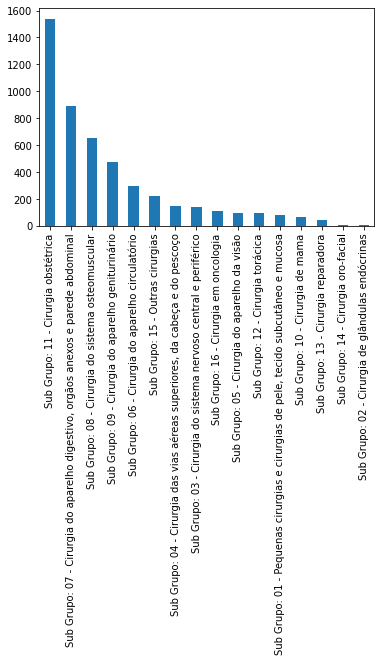

In [7]:
# plotar um gráfico por subgrupo 
df['Sub Grupo Procedimento'].value_counts().plot.bar()

In [8]:
# criando um subconjunto de dados originais com um novo data frame
# = atribuição
# == comparação entre dados

df_hospbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']

# ver linhas iniciais
df_hospbase.head(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [9]:
#linhas finais
df_hospbase.tail(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
2372,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,SEGMENTECTOMIA/QUADRANTECTOMIA/SETORECTOMIA DE...
2373,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ESTUDO ELETROFISIOLOGICO TERAPEUTICO II (ABLAC...


In [10]:
#  listar linhas aleatorias
df_hospbase.sample(5)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
1730,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1311,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO /...
234,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipos lesões/envenenamentos por agentes...,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL AGUDO
1768,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO /...
821,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS S...


In [11]:
# quantidade de procedimentos no hospital de base
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                 47
TRAQUEOSTOMIA                                                                                     28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                                     26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                         23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                                21
                                                                                                  ..
PLASTICA TOTAL DO PENIS                                                                            1
TRATAMENTO CIRÚRGICO DE FRATURA / LESÃO FISARIA DA EXTREMIDADE PROXIMAL DO UMERO                   1
RECONSTRUÇÃO DE POLIA TENDINOSA DOS DEDOS DA MÃO                                                   1
TRATAMENTO CIRÚRGICO DE PSEUDARTROSE / RETARDO DE CONSOLIDAÇÃO/ PERDA ÓSSEA DA METÁFISE TIB

In [12]:
# subdividir o dataframe com base em um pedaço de palavra (like no oracle)
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital                  33
Municipio                 33
Complexidade              33
Carater Atendimento       33
Sub Grupo Procedimento    33
Procedimento              33
dtype: int64

In [13]:
# subdividir o dataframe original com base em um pedaço de palavra (parto cesariana) (like no oracle)
df_parto_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']

# primeiras linhas
df_parto_cesariano.head()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
132,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
133,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
141,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [14]:
# quantidade de partos cesarianos por hospital
df_parto_cesariano['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
0010502 HRS                                            92
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

In [15]:
# quantidade de partos cesarianos por carater atendimento
df_parto_cesariano['Carater Atendimento'].value_counts()

Urgência    1041
Eletivo       19
Name: Carater Atendimento, dtype: int64

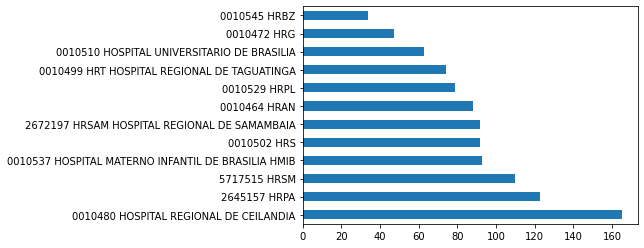

In [16]:
# grafico horizontal
df_parto_cesariano['Hospital'].value_counts().plot.barh()

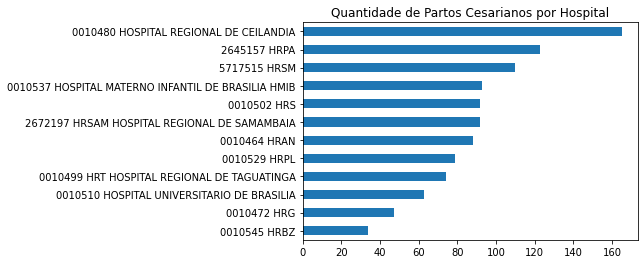

In [17]:
# melhorando o grafico (invertendo ordem e incluíndo título)
df_parto_cesariano['Hospital'].value_counts(ascending=True).plot.barh(title='Quantidade de Partos Cesarianos por Hospital')

#Análises extras, além do que foi apresentado em aula


Inicialmente a ideia é ter um overview dos dados, para entender melhor o dataset. Para isso, a ideia é verificar alguns exemplos do dataset e realizar uma análise com o pandas profiling.

In [24]:
print("Existem {} observações e {} features nesse dataset. \n".format(df.shape[0],df.shape[1]))

print("Existem {} tipos de procedimentos no dataset, como {}... \n".format(len(df.Procedimento.unique()),
                                                                           ", ".join(df.Procedimento.unique()[0:5])))

print("Existem {} hospitais relizando os procedimentos nesse dataset, como {}... \n".format(len(df.Hospital.unique()),
                                                                                      ", ".join(df.Hospital.unique()[0:5])))

Existem 4862 observações e 6 features nesse dataset. 

Existem 495 tipos de procedimentos no dataset, como TRATAMENTO C/ CIRURGIAS MULTIPLAS, DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA, HERNIOPLASTIA UMBILICAL, RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA, IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SEMI OU TOTALMENTE IMPLANTAVEL (PROCEDIMENTO PRINCIPAL)... 

Existem 16 hospitais relizando os procedimentos nesse dataset, como 6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB, 0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL, 0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA, 0010545 HRBZ, 0010480 HOSPITAL REGIONAL DE CEILANDIA... 



In [18]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Cigurgias DF', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Após análise, percebemos que o profiling apresentou alguns alertas, como valores duplicados, cardinalidade e alta correlação entre dados. Sobre isso, temos que:

*   Como pegamos apenas algumas colunas do dataset original, incluindo identificadores unicos de procedimentos, faz sentido ter valores repetidos, uma vez que isso significa que um procedimento ocorreu mais de uma vez num mesmo hospital;
*   A alta cardinalidade está nos procedimentos, e uma vez que essa é a coluna que tem a maior chance de ter variação, não existem problemas nesse tema;
*   A alta correlação está entre os campos Municipio e Hospital, o que faz todo o sentido.

Com essa visão sobre o dataset, não existe nenhum tipo de tratamento extra necessário para o mesmo e com isso, apenas irei gerar alguns plots para entender melhor as ocorrências de procedimentos. Os plots serão:

*   Distribuição de complexidade de cirurgia por hospital;
*   Wordcloud de procedimentos;


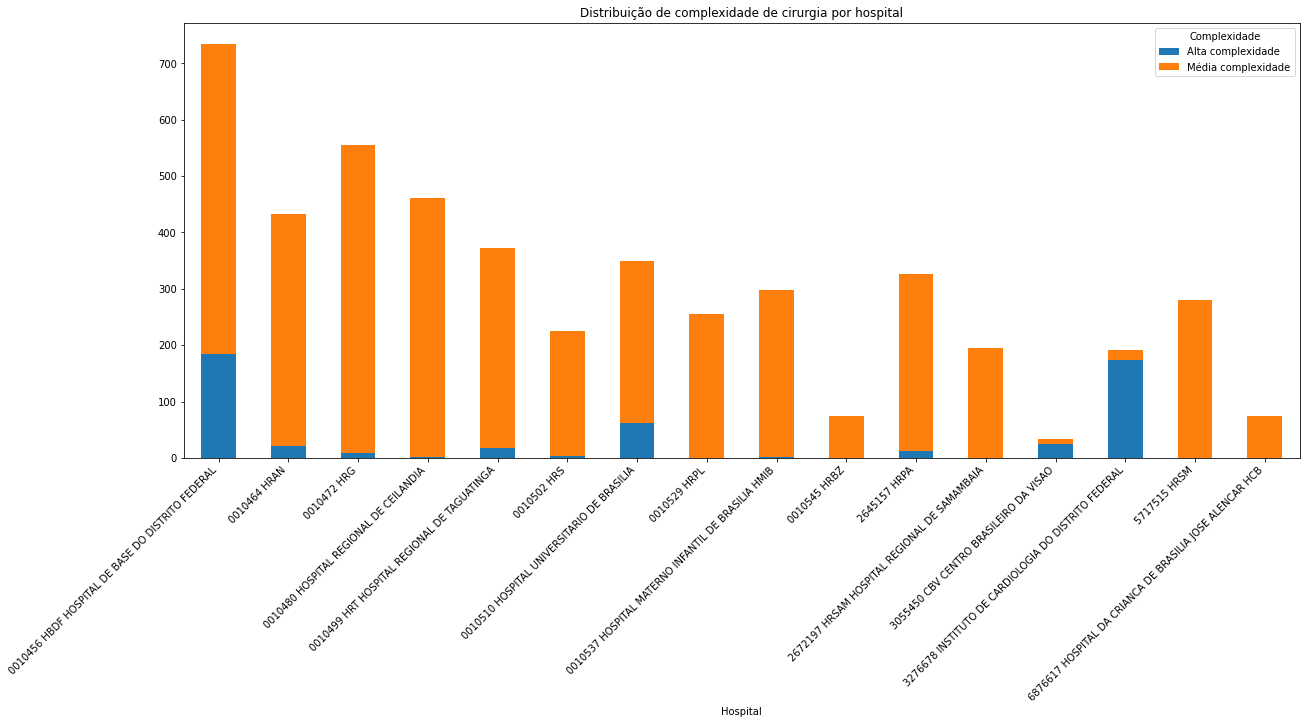

In [61]:
df_trunc1=df[['Hospital','Complexidade','Municipio']]
sub_df1=df_trunc1.groupby(['Hospital','Complexidade'])['Municipio'].count()
sub_df1.unstack().plot(kind='bar',stacked=True,rot=1,figsize=(20,8),title="Distribuição de complexidade de cirurgia por hospital")
plt.xticks(rotation=45,horizontalalignment='right')
plt.show()

Aqui, podemos perceber que a maior quantidade de cirurgias realizadas são consideradas como de média complexidade, e que os hospitais com maior quantidade de rocedimentos realizados são HBDF, HRG e Hospital Regional de Ceilância. Além disso, pode-se visualizar que os hospitais que mais realizaram procedimentos de alta complexidade foram: HBDF, Instituto de cardiologia do DF e o Hospital universitário de Brasília.

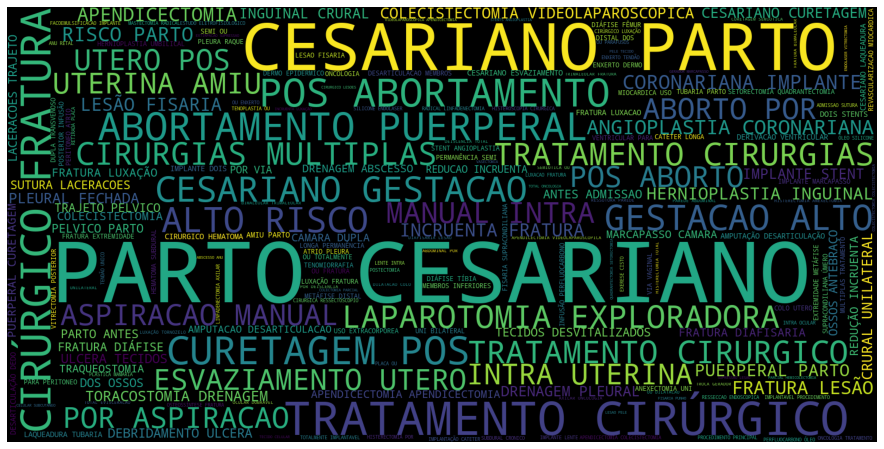

In [43]:
# importar os pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df_procedimento = df['Procedimento']


# concatenar as palavras
all_summary = " ".join(s for s in df_procedimento)

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Com essa wordcloud, é possível visualizar que a maior parte dos procedimentos realizados, foram cirurgias de parto e abortamento, que como visto no profiling, são os procedimentos que mais ocorreram no dataset.